# Data_set:
The data we are using for EDA is the auto mpg dataset taken from UCI repository.

Information regarding data

    Title: Auto-Mpg Data
    
    Number of Instances: 398
    
    Number of Attributes: 9 including the class attribute

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the datset
data=pd.read_csv('auto-mpg.csv')

In [4]:
data.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


# 1. Data Understanding

In [5]:
#With this we get to know about number of rows and columns.
data.shape

(398, 9)

In [7]:
#The number of rows.
print("The number of rows:" ,data.shape[0] )

The number of rows: 398


In [8]:
#The number of columns.
print("The number of columns:",data.shape[1])

The number of columns: 9


In [9]:
#Types of variables
print('Number of categorical variable:',data.select_dtypes(object).shape[1])
print('Number of Numerical variable:',data.select_dtypes(np.number).shape[1])

Number of categorical variable: 2
Number of Numerical variable: 7


In [12]:
#The 5-point summary for numerical variable.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [14]:
#Summarize observations for categorical variables – no. of categories, % observations in each category.
for i in data.select_dtypes(object):
    print(i)
    print((data[i].value_counts(normalize = True)*100))
    print()


horsepower
horsepower
150    5.527638
90     5.025126
88     4.773869
110    4.522613
100    4.271357
         ...   
61     0.251256
93     0.251256
148    0.251256
152    0.251256
82     0.251256
Name: proportion, Length: 94, dtype: float64

car name
car name
ford pinto             1.507538
toyota corolla         1.256281
amc matador            1.256281
ford maverick          1.256281
chevrolet chevette     1.005025
                         ...   
chevrolet monza 2+2    0.251256
ford mustang ii        0.251256
pontiac astro          0.251256
amc pacer              0.251256
chevy s-10             0.251256
Name: proportion, Length: 305, dtype: float64



# Data Preparation

In [15]:
#Check for defects in the data such as missing values, null, outliers, etc. 
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [19]:
#These are all the columns which is categorical and numerical in nature.
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [23]:
#These are the numerical columns and categorical columns
num_cols=['mpg','cylinders','displacement','weight','acceleration','model year','origin']
cat_cols=['car name']

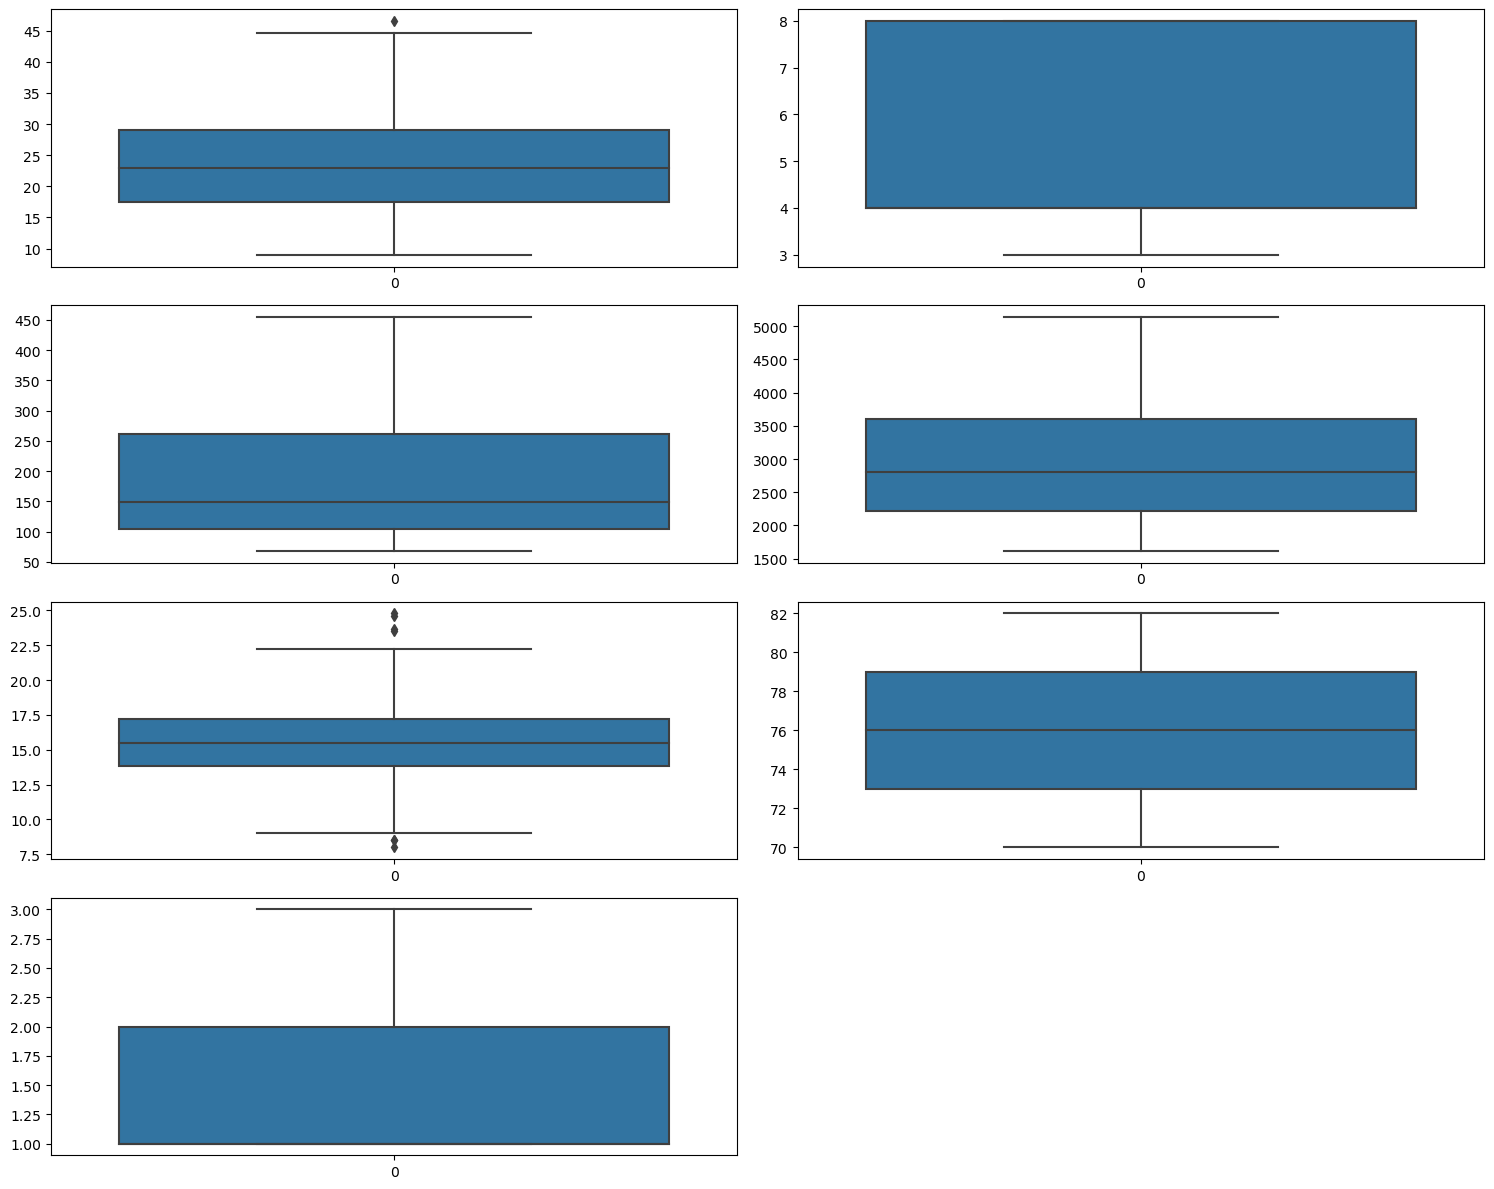

In [24]:
#To detect outliers.
plt.figure(figsize=(15,12))
t = 1 
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

In [25]:
#Fix the defects found above and do appropriate treatment if any. 
#Note:
#There are no missing value and no outliers.so,we don't need defect treatment.

<Axes: >

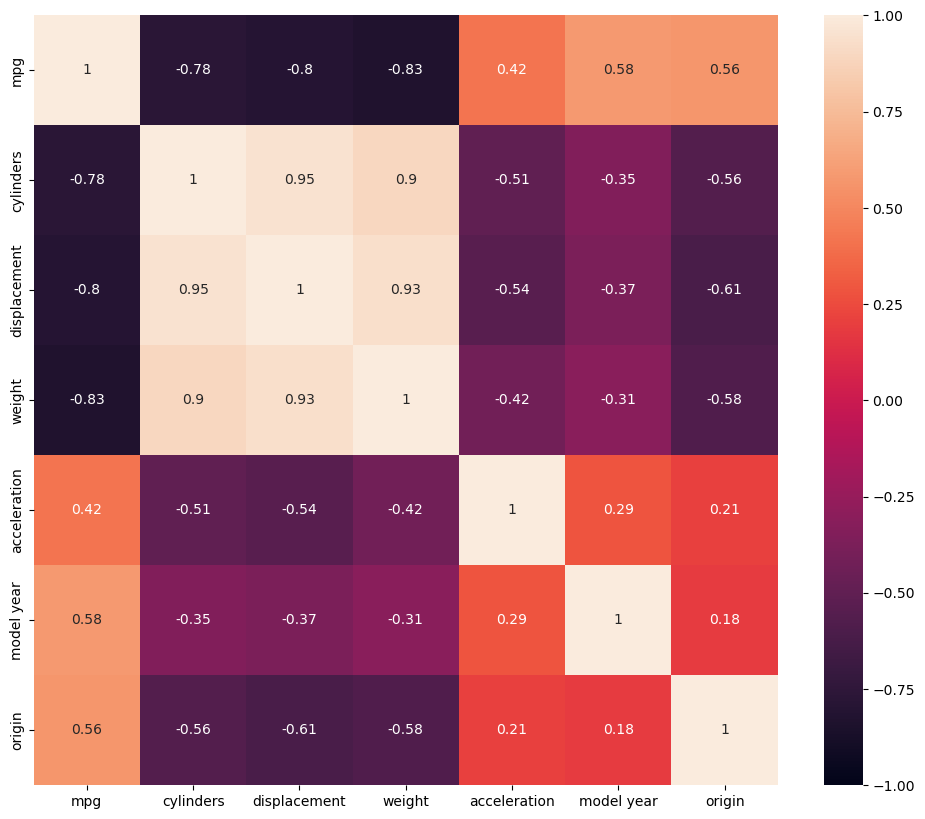

In [27]:
#Visualize the data using relevant plots.We will figure out the variable which is highly correlated to target variable.
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(numeric_only=True),vmax = 1 , vmin = -1 ,annot = True)

<Axes: xlabel='weight', ylabel='mpg'>

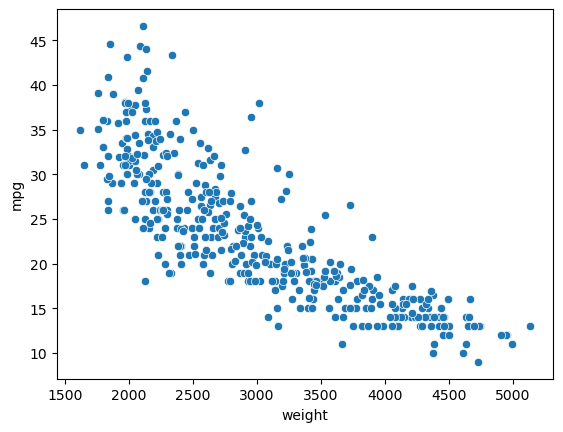

In [28]:
sns.scatterplot(x = data['weight'], y = data['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

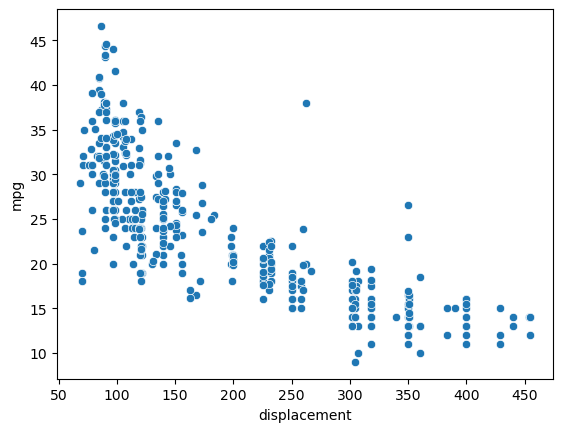

In [29]:
sns.scatterplot(x = data['displacement'], y = data['mpg'])

<Axes: xlabel='cylinders', ylabel='mpg'>

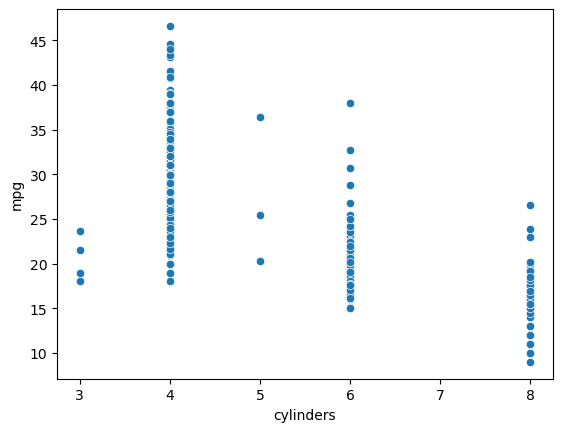

In [30]:
sns.scatterplot(x = data['cylinders'], y = data['mpg'])

In [31]:
# Here car name is not significant with mpg . so , we can drop the columns car name
data.drop(columns=['car name'],inplace=True)

# Train and Test

In [32]:
#Split dataset into train and test (70:30).
#Are both train and test representative of the overall data? How would you ascertain this statistically? 
from sklearn.model_selection import train_test_split

In [33]:
x = data.drop(columns = ['mpg'])
y = data.mpg

In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.70,random_state=1)

In [35]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((278, 7), (120, 7), (278,), (120,))

In [37]:
from scipy import stats

In [38]:
# Statistically  check
p_value = stats.ttest_ind(ytrain,ytest)[1]
print('p_value:',p_value)

if p_value < 0.05:
    print('Reject Ho: Data is not equally distributed')
else:
    print('Fail to Reject Ho: Data is  equally distributed ')

p_value: 0.7383273743965362
Fail to Reject Ho: Data is  equally distributed 


# Model Building

In [45]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [46]:
x = data.drop(columns=['mpg','horsepower'])
y = data.mpg

In [47]:
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [48]:
model = sma.OLS(y,sma.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     298.0
Date:                Mon, 09 Sep 2024   Prob (F-statistic):          1.82e-142
Time:                        20:56:31   Log-Likelihood:                -1040.7
No. Observations:                 398   AIC:                             2095.
Df Residuals:                     391   BIC:                             2123.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.7558      4.140     -4.772      0.000     -27.896     -11.616
cylinders       -0.3848      0.320     -1.204      0.229      -1.013       0.244
displacement     0.0171      0.007      2.371      0.018       0.003       0.031
weight          -0.0070      0.001    -12.031      0.000      -0.008      -0.006
acceleration     0.1520      0.077      1.966      0.050    1.31e-05       0.304
model year       0.7659      0.049     15.541      0.000       0.669       0.863
origin           1.3691      0.269      5.086      0.000       0.840       1.898
==============================================================================
Omnibus:                       29.660   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.068
Skew:                           0.500   Prob(JB):                     3.65e-11
Kurtosis:                       4.377   Cond. No.                     7.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#Check for multi-collinearity and treat the same.
vif_list = []
for i in range(x.shape[1]):
    vif_list.append(variance_inflation_factor(x.values,i))
pd.DataFrame({'Feature': x.columns,'VIF':vif_list}).sort_values(by = 'VIF', ascending = False)

,Feature,VIF
0,cylinders,116.627548
2,weight,114.041768
4,model year,97.210619
1,displacement,88.866392
3,acceleration,50.382942
5,origin,7.583079


In [53]:
#How would you improve the model? Write clearly the changes that you will make before refitting the model. Fit the final model.

In [63]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

def model_validation(x, y, model):
    global m 
    m = model
    m.fit(x, y)
    pred = m.predict(x)
    
    print('R^2:', r2_score(y, pred))
    print('MAPE:', mean_absolute_percentage_error(y, pred))

In [ ]:
#Write down a business interpretation/explanation of the model – which variables are affecting the target the most 
#and explain the relationship. Feel free to use charts or graphs to explain. 

<Axes: xlabel='origin', ylabel='mpg'>

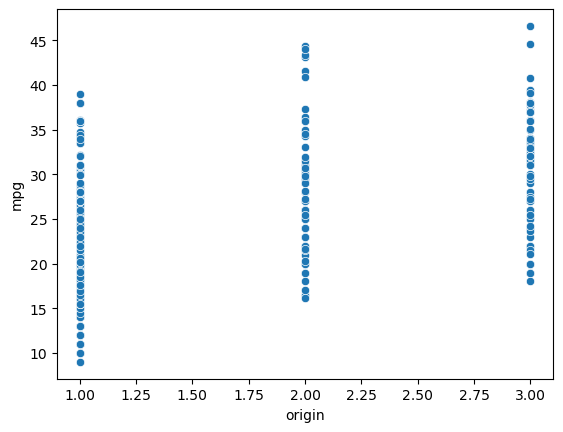

In [64]:
sns.scatterplot(x=data['origin'] , y = data['mpg'])

<Axes: xlabel='model year', ylabel='mpg'>

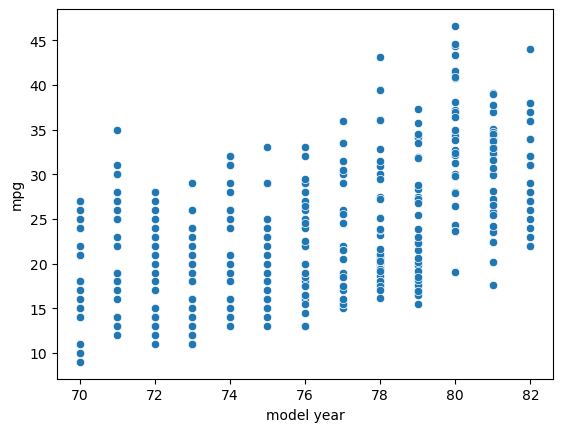

In [65]:
sns.scatterplot(x=data['model year'] , y = data['mpg'])

<Axes: xlabel='model year', ylabel='mpg'>

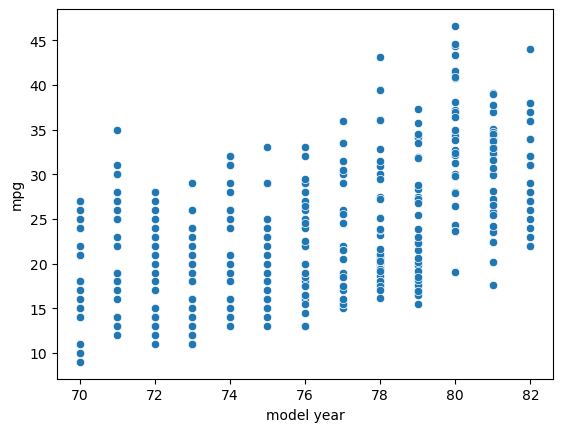

In [66]:
sns.scatterplot(x=data['model year'] , y = data['mpg'])